In [19]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [20]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [21]:
!pip install --upgrade -q threadpoolctl


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations (again for consistency)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")


## Step 1: Load and Inspect the Data


In [28]:
# Load dataset
df = pd.read_csv("overstimulation_dataset.csv")

In [29]:
# Basic inspection
print("\nDataset Shape:", df.shape)



Dataset Shape: (2000, 20)


In [30]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Missing Values:
 Age                    0
Sleep_Hours            0
Screen_Time            0
Stress_Level           0
Noise_Exposure         0
Social_Interaction     0
Work_Hours             0
Exercise_Hours         0
Caffeine_Intake        0
Multitasking_Habit     0
Anxiety_Score          0
Depression_Score       0
Sensory_Sensitivity    0
Meditation_Habit       0
Overthinking_Score     0
Irritability_Score     0
Headache_Frequency     0
Sleep_Quality          0
Tech_Usage_Hours       0
Overstimulated         0
dtype: int64

Data Types:
 Age                      int64
Sleep_Hours            float64
Screen_Time            float64
Stress_Level             int64
Noise_Exposure           int64
Social_Interaction       int64
Work_Hours               int64
Exercise_Hours         float64
Caffeine_Intake          int64
Multitasking_Habit       int64
Anxiety_Score            int64
Depression_Score         int64
Sensory_Sensitivity      int64
Meditation_Habit         int64
Overthinking_Score   

##  Step 2: Exploratory Data Analysis (EDA)

In [31]:
 ### Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
            Age  Sleep_Hours  Screen_Time  Stress_Level  Noise_Exposure  \
count 2000.000     2000.000     2000.000      2000.000        2000.000   
mean    38.700        6.501        6.404         4.989           2.050   
std     12.071        2.022        3.143         2.630           1.431   
min     18.000        3.000        1.000         1.000           0.000   
25%     28.000        4.764        3.715         3.000           1.000   
50%     39.000        6.542        6.312         5.000           2.000   
75%     49.000        8.241        9.111         7.000           3.000   
max     59.000        9.992       11.995         9.000           4.000   

       Social_Interaction  Work_Hours  Exercise_Hours  Caffeine_Intake  \
count            2000.000    2000.000        2000.000         2000.000   
mean                4.521       8.920           1.511            1.961   
std                 2.848       3.142           0.863            1.429   
min            

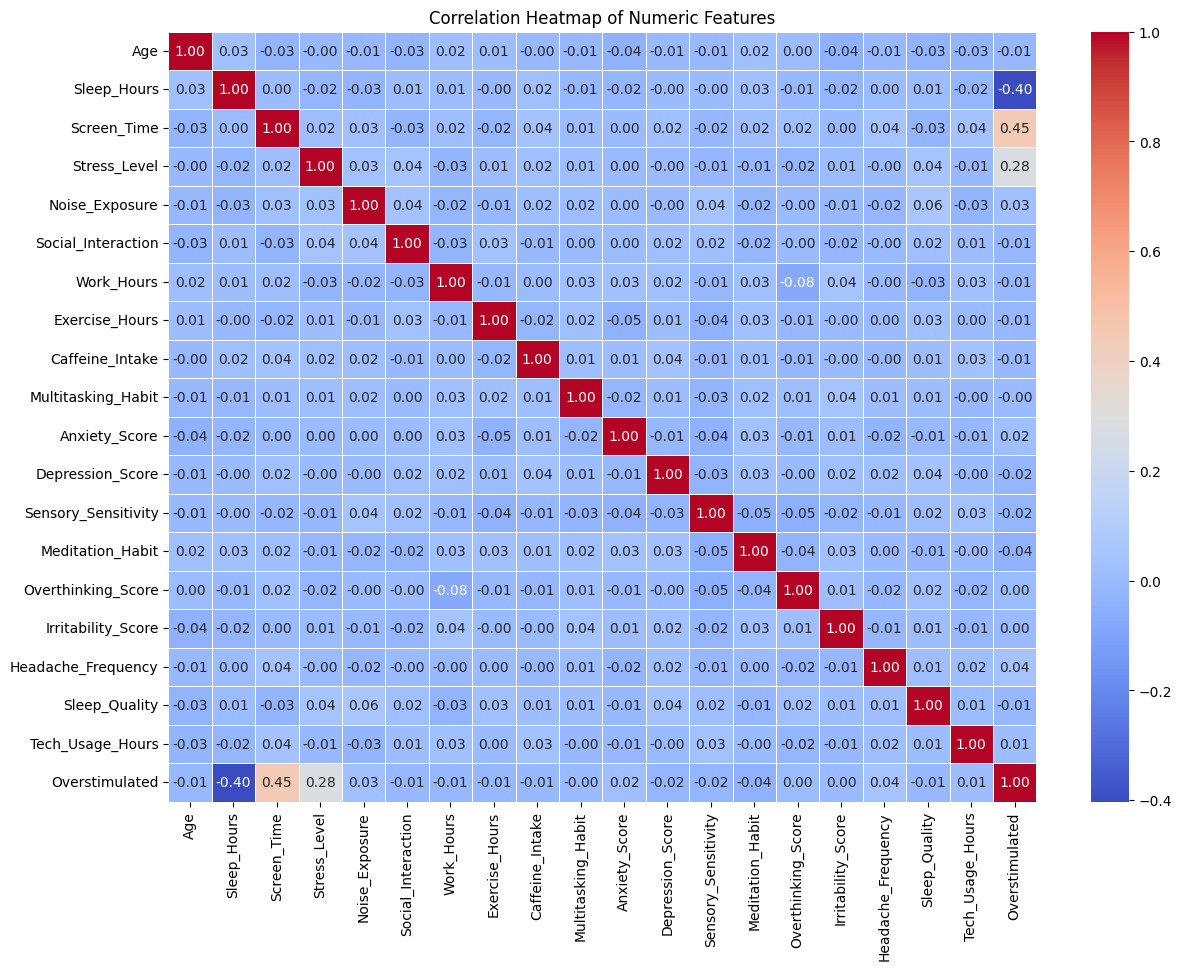

In [32]:
# ### Correlation matrix heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


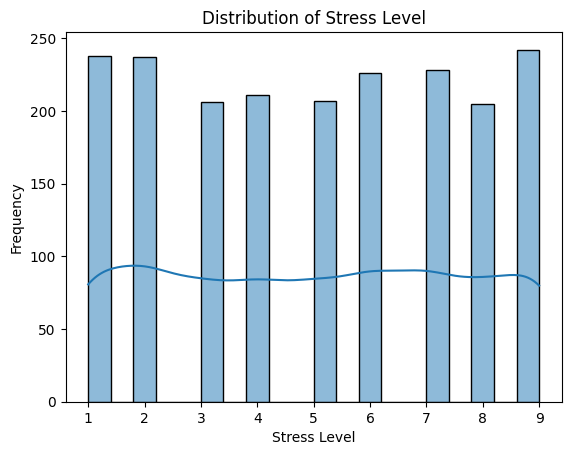

In [33]:
# ### Histogram of Stress Level
sns.histplot(df['Stress_Level'], kde=True, bins=20)
plt.title("Distribution of Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()


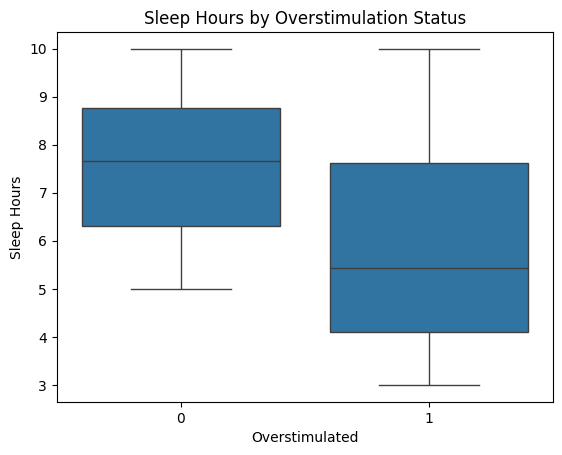

In [34]:
# ### Boxplot: Sleep Hours by Overstimulated
sns.boxplot(x='Overstimulated', y='Sleep_Hours', data=df)
plt.title("Sleep Hours by Overstimulation Status")
plt.xlabel("Overstimulated")
plt.ylabel("Sleep Hours")
plt.show()


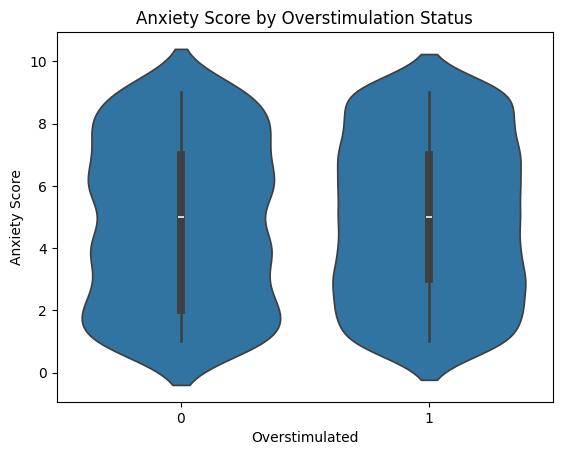

In [35]:
# ### Violin Plot: Anxiety Score by Overstimulated
sns.violinplot(x='Overstimulated', y='Anxiety_Score', data=df)
plt.title("Anxiety Score by Overstimulation Status")
plt.xlabel("Overstimulated")
plt.ylabel("Anxiety Score")
plt.show()

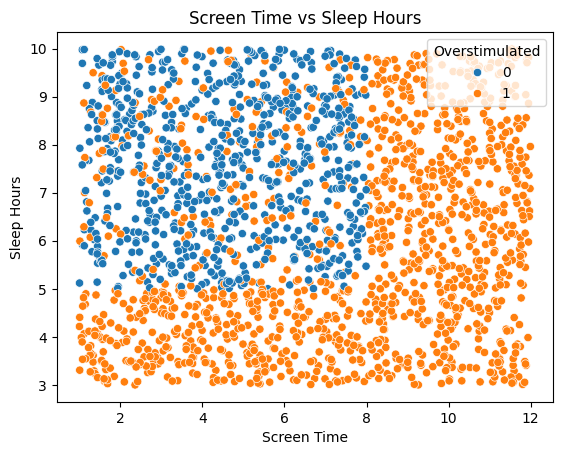

In [36]:
# ### Scatter Plot: Screen Time vs Sleep Hours
sns.scatterplot(data=df, x='Screen_Time', y='Sleep_Hours', hue='Overstimulated')
plt.title("Screen Time vs Sleep Hours")
plt.xlabel("Screen Time")
plt.ylabel("Sleep Hours")
plt.show()

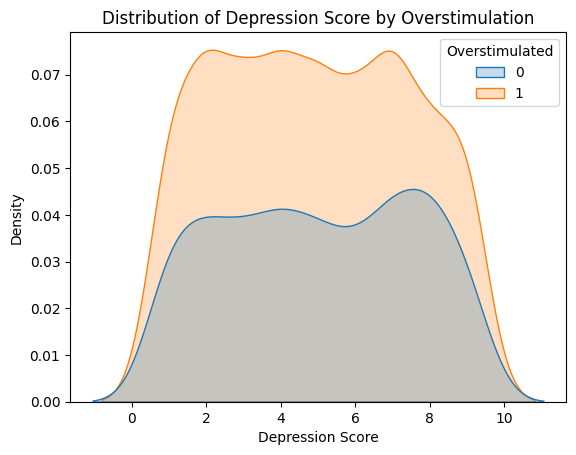

In [37]:
# ### KDE Plot: Depression Score by Overstimulated
sns.kdeplot(data=df, x='Depression_Score', hue='Overstimulated', fill=True)
plt.title("Distribution of Depression Score by Overstimulation")
plt.xlabel("Depression Score")
plt.ylabel("Density")
plt.show()

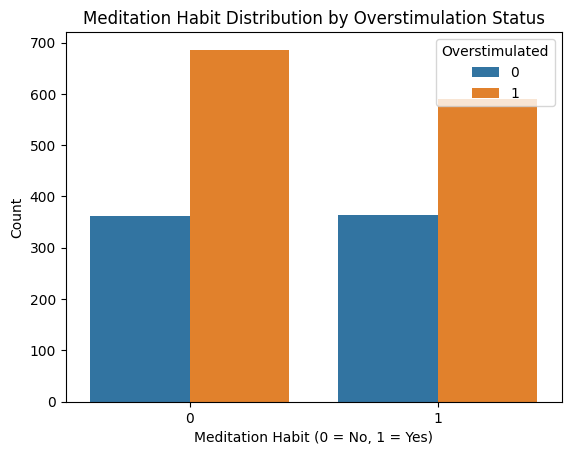

In [38]:
# ### Countplot of Meditation Habit
sns.countplot(data=df, x='Meditation_Habit', hue='Overstimulated')
plt.title("Meditation Habit Distribution by Overstimulation Status")
plt.xlabel("Meditation Habit (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

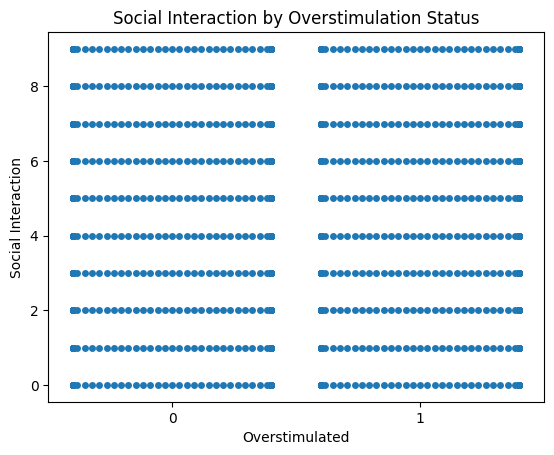

In [39]:
# ### Swarmplot: Social Interaction by Overstimulated
sns.swarmplot(x='Overstimulated', y='Social_Interaction', data=df)
plt.title("Social Interaction by Overstimulation Status")
plt.xlabel("Overstimulated")
plt.ylabel("Social Interaction")
plt.show()

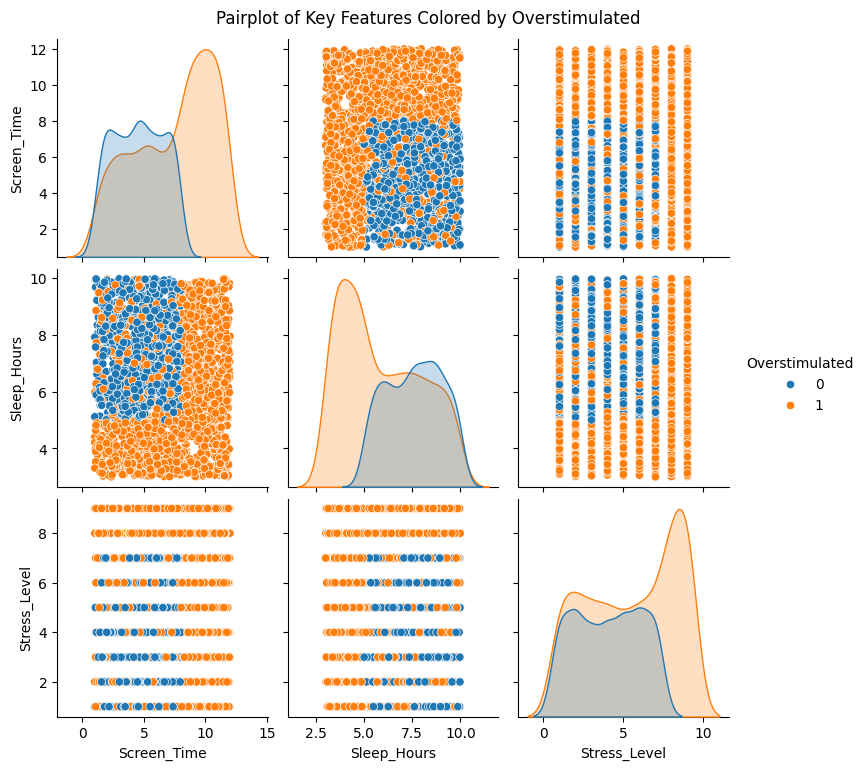

In [40]:

# ### Pairplot (subset of key variables)
sns.pairplot(df[['Screen_Time', 'Sleep_Hours', 'Stress_Level', 'Overstimulated']], hue='Overstimulated')
plt.suptitle("Pairplot of Key Features Colored by Overstimulated", y=1.02)
plt.show()

##  Step 3: Hypothesis Testing

In [41]:
from scipy.stats import ttest_ind

# High vs Low Screen Time
median_screen = df['Screen_Time'].median()
high_screen = df[df['Screen_Time'] > median_screen]['Overstimulated']
low_screen = df[df['Screen_Time'] <= median_screen]['Overstimulated']
t_stat, p_val = ttest_ind(high_screen, low_screen)
print(f"\nT-Test for Screen Time (High vs Low): t={t_stat:.2f}, p={p_val:.4f}")



T-Test for Screen Time (High vs Low): t=18.58, p=0.0000
